# Michael Vazquez<br>Econ 570, Assignment 1<br>Link to code: https://github.com/Vazquez-Michael-V/570_homework/blob/main/assignment_1/assignment_1.ipynb

# Imports.

In [152]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os

from IPython import get_ipython
from IPython.display import Image, display




In [153]:
%matplotlib inline

# Functions.

In [154]:
def summary_statistics(df: pd.DataFrame, stats_col_name: str, date_col_name: str) -> dict:

    """
    Use this function to find the summary statistics discussed in the slides, "Lecture2_SP2026.pdf".

    Parameters
    ----------
    df : pd.DataFrame
        Passed DataFrame containing stats_col_name and date_col_name.
    stats_col_name : str
        Column on which to calculate the summary statistics.
    date_col_name : str
        Column on which to find min and max date.

    Returns
    -------
    dict
        Key 'df_summary_stats' contains the DataFrame of summary statistics.
        Key 'min_date' is the minimum of date_col_name.
        Key 'max_date' is the maximum of date_col_name.

    """

    df_summary_stats = pd.DataFrame(
    data={
        'mean': [df[stats_col_name].mean()],
        'median': [df[stats_col_name].median()],
        'var': [df[stats_col_name].var()],
        'std_dev': [df[stats_col_name].std()],
        'skewness': [df[stats_col_name].skew()],
        'kurtosis': [df[stats_col_name].kurtosis()]
        }
    ).T\
    .reset_index(names='statistic')\
    .rename(columns={0: 'value'}, errors='raise')\
    .round(4)

    return {
        'df_summary_stats': df_summary_stats,
        'min_date': df[date_col_name].min(),
        'max_date': df[date_col_name].max()
        }


# Notebook variables.

In [155]:
assignment_1_dir = os.getenv("ECON_570_ASSIGNMENT_1_DIR")
assignment_1_images_dir = os.getenv("ECON_570_ASSIGNMENT_1_IMAGES_DIR")


# Question 1.0 - Download and prep data on Industrial Production, IP.

## INDPRO data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/INDPRO#

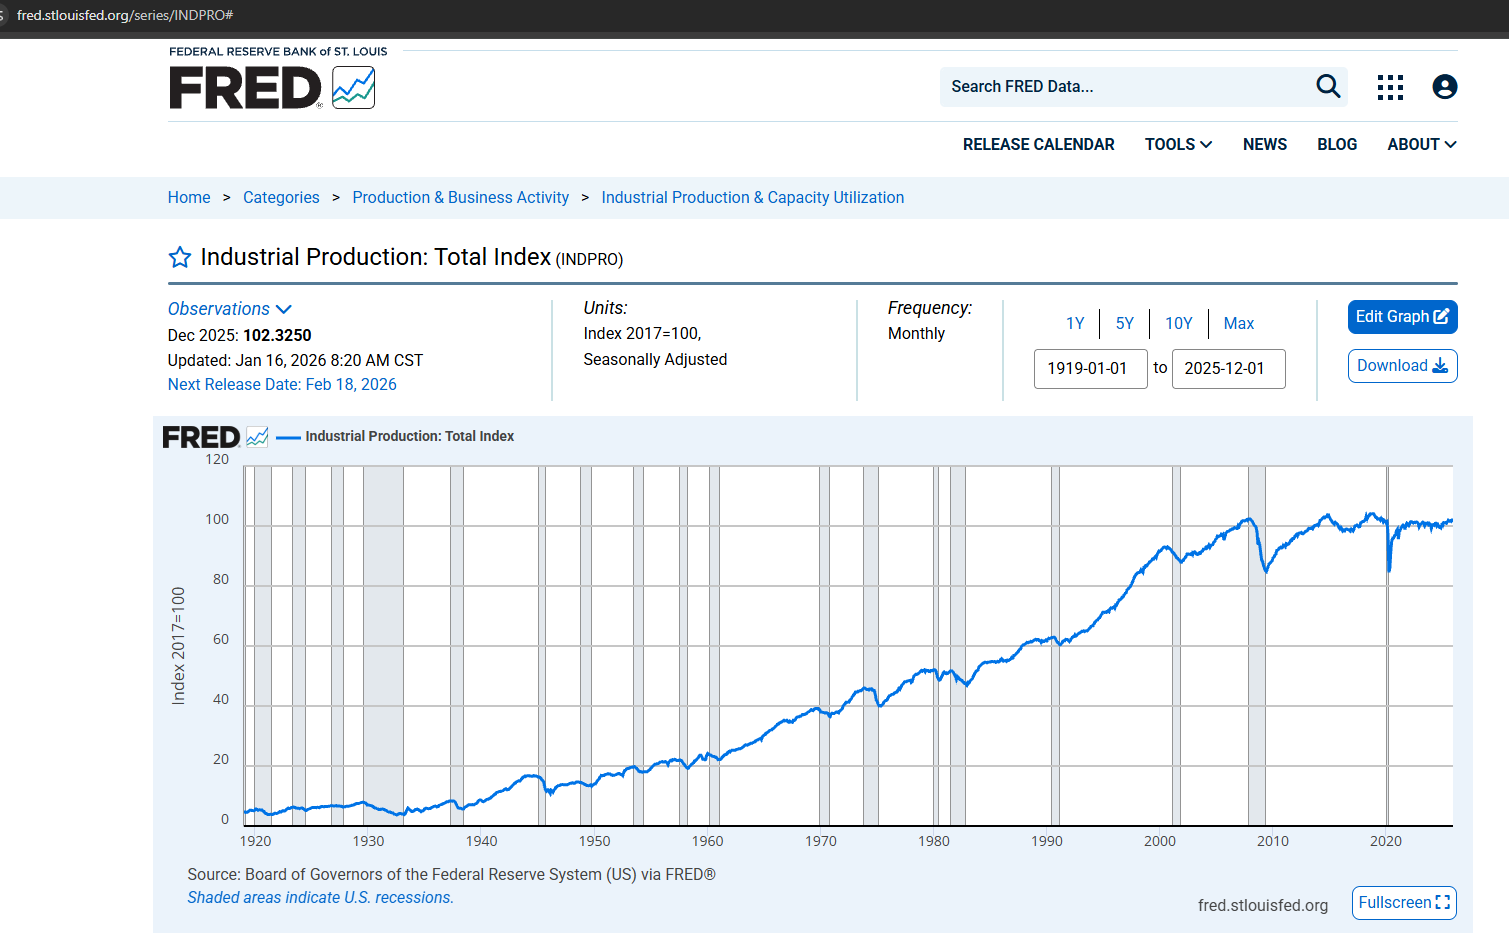

In [156]:
display(Image(rf'{assignment_1_images_dir}\\fred_indpro_download.png'))

## Read the downloaded INDPRO csv and assign dtypes.

In [157]:
df_indpro = pd.read_csv(rf"{assignment_1_dir}\\INDPRO.csv")
df_indpro['observation_date'] = pd.to_datetime(df_indpro['observation_date'])
df_indpro = df_indpro.rename(columns={'INDPRO': 'indpro'})

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Successfully read INDPRO file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB
None
df_indpro shape: (1284, 2)
Successfully read INDPRO file.


## Add additional timeframe columns.

In [158]:
df_indpro = df_indpro.assign(
    year_quarter = pd.PeriodIndex(
        df_indpro['observation_date'],
        freq='Q'
    ),
    year_month = df_indpro['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
 2   year_quarter      1284 non-null   period[Q-DEC] 
 3   year_month        1284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 40.3 KB
None
df_indpro shape: (1284, 4)
Additional timeframe columns have been assigned.


## Sort df_indpro by observation_date ascending.

In [159]:
df_indpro = df_indpro.sort_values(by=['observation_date']).reset_index(drop=True)

## Display some rows of df_indpro.

In [160]:
display(df_indpro.sample(n=10))

,observation_date,indpro,year_quarter,year_month
46,1922-11-01,5.7894,1922Q4,192211
842,1989-03-01,62.1369,1989Q1,198903
789,1984-10-01,54.4406,1984Q4,198410
761,1982-06-01,48.6214,1982Q2,198206
823,1987-08-01,58.7636,1987Q3,198708
1001,2002-06-01,90.7061,2002Q2,200206
1130,2013-03-01,99.1921,2013Q1,201303
1066,2007-11-01,102.3446,2007Q4,200711
450,1956-07-01,20.4380,1956Q3,195607
41,1922-06-01,5.0893,1922Q2,192206


# __ALL QUESTIONS__ - Create dictionaries for all 3 timeframes in the homework instructions.

In [161]:
# Let's organize variables in a dictionary to avoid confusion.
# tf for timeframe.

# Timeframe containing all dates in the downloaded INDPRO data.
tf_all_dict = {'df': df_indpro}
tf_all_dict = tf_all_dict | summary_statistics(tf_all_dict['df'], 'indpro', 'observation_date')
assert tf_all_dict['min_date'] == pd.Timestamp(1919, 1, 1), "Minimum date of all timeframe data is not 1919-01-01."
assert tf_all_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of all timeframe data is not 2025-12-01."


# Timeframe from 2000-01 to present.
tf_00s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2000-01-01', '2025-12-31')), :].copy()}
tf_00s_dict = tf_00s_dict | summary_statistics(tf_00s_dict['df'], 'indpro', 'observation_date')
assert tf_00s_dict['min_date'] == pd.Timestamp(2000, 1, 1), "Minimum date of the 00s data is not 2000-01-01."
assert tf_00s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 00s data is not 2025-12-01."


# Timeframe from 2020-06 to present.
tf_20s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2020-06-01', '2025-12-31')), :].copy()}
tf_20s_dict = tf_20s_dict | summary_statistics(tf_20s_dict['df'], 'indpro', 'observation_date')
assert tf_20s_dict['min_date'] == pd.Timestamp(2020, 6, 1), "Minimum date of the 20s data is not 2020-06-01."
assert tf_20s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 20s data is not 2025-12-01."


display(tf_all_dict['df']['observation_date'].describe())
display(tf_00s_dict['df']['observation_date'].describe())
display(tf_20s_dict['df']['observation_date'].describe())


count                             1284
mean     1972-06-16 02:01:07.289719632
min                1919-01-01 00:00:00
25%                1945-09-23 12:00:00
50%                1972-06-16 00:00:00
75%                1999-03-08 18:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                              312
mean     2012-12-15 17:23:04.615384576
min                2000-01-01 00:00:00
25%                2006-06-23 12:00:00
50%                2012-12-16 12:00:00
75%                2019-06-08 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                               67
mean     2023-03-02 08:57:18.805970176
min                2020-06-01 00:00:00
25%                2021-10-16 12:00:00
50%                2023-03-01 00:00:00
75%                2024-07-16 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

# Question 1.1, 1.2, and 1.3 - Summary statistics and plots.

## Question 1.1 - Summary statistics from 1919-01 to 2025-12.

In [162]:
print(f"INDPRO summary statistics, timeframe from {tf_all_dict['min_date'].strftime('%Y-%m')} to {tf_all_dict['max_date'].strftime('%Y-%m')}.")
display(tf_all_dict['df_summary_stats'])


INDPRO summary statistics, timeframe from 1919-01 to 2025-12.


,statistic,value
0,mean,46.7118
1,median,40.5312
2,var,1234.6693
3,std_dev,35.1379
4,skewness,0.3519
5,kurtosis,-1.3768


## Question 1.2 - Summary statistics from 2000-01 to 2025-12.

In [163]:
print(f"INDPRO summary statistics, timeframe from {tf_00s_dict['min_date'].strftime('%Y-%m')} to {tf_00s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_00s_dict['df_summary_stats'])

INDPRO summary statistics, timeframe from 2000-01 to 2025-12.


,statistic,value
0,mean,97.2391
1,median,98.8828
2,var,22.4107
3,std_dev,4.7340
4,skewness,-0.7187
5,kurtosis,-0.5824


## Question 1.3 - Summary statistics from 2020-06 to 2025-12.

In [164]:
print(f"INDPRO summary statistics, timeframe from {tf_20s_dict['min_date'].strftime('%Y-%m')} to {tf_20s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_20s_dict['df_summary_stats'])

INDPRO summary statistics, timeframe from 2020-06 to 2025-12.


,statistic,value
0,mean,100.0180
1,median,100.5726
2,var,3.5061
3,std_dev,1.8724
4,skewness,-2.2486
5,kurtosis,6.1790


# Question 1.4 - Plot the data.

## IP boxplots for Question 1.

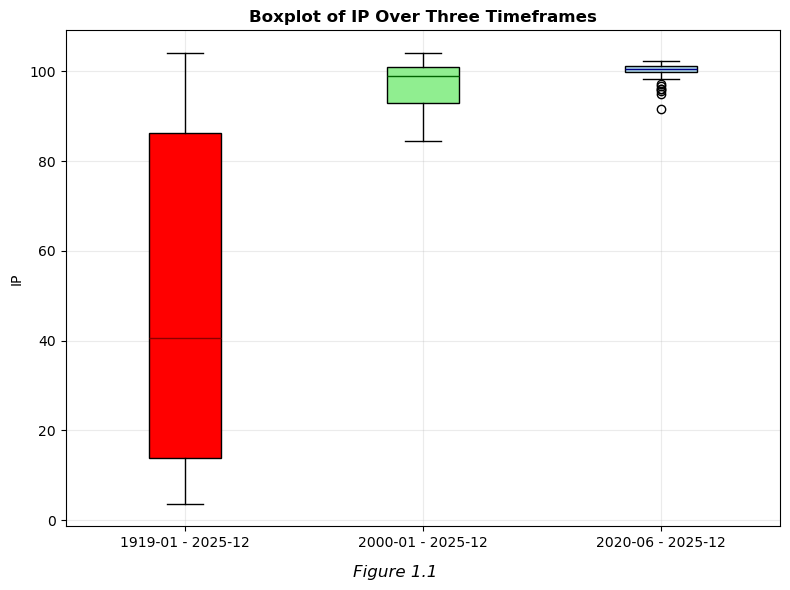

In [184]:
fig_box, ax_box = plt.subplots(figsize=(8, 6))

bp = ax_box.boxplot(
    [tf_all_dict['df']['indpro'], tf_00s_dict['df']['indpro'], tf_20s_dict['df']['indpro']],
    positions=[1, 2, 3],
    tick_labels=[
        f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}"
    ],
    patch_artist=True
)


box_colors = ['red', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

median_colors = ['darkred', 'darkgreen', 'darkblue']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(1)


ax_box.set_ylabel('IP')
ax_box.set_title("Boxplot of IP Over Three Timeframes", fontweight='bold')
ax_box.grid(True, alpha=0.25)

fig_box.text(0.5, 0.03, 'Figure 1.1', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## IP line plots for Question 1.

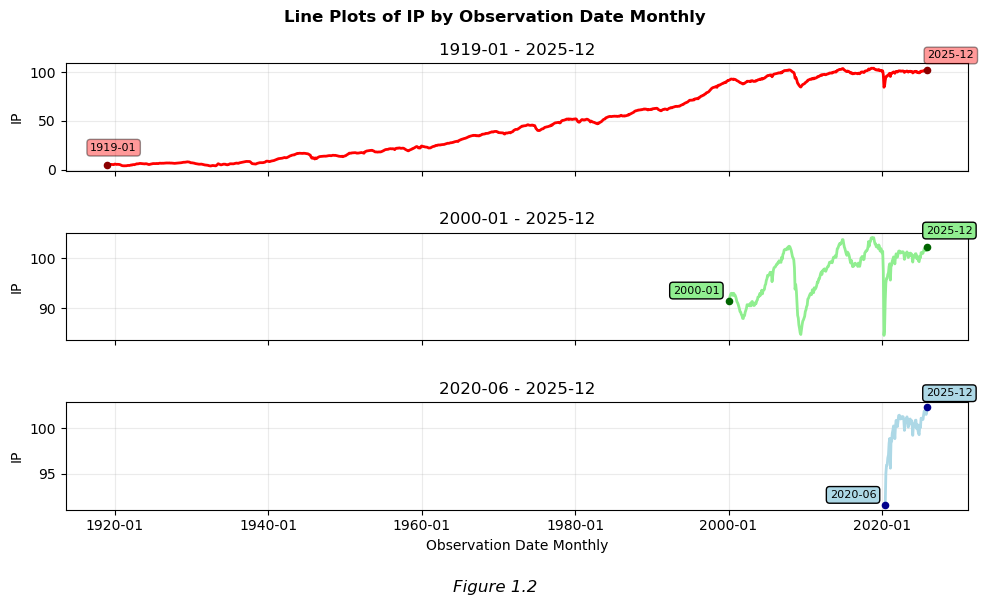

In [181]:
fig_lines, axes_lines = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True, sharey=False)

######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes_lines[0].plot(tf_all_dict['df']['observation_date'], tf_all_dict['df']['indpro'], label='all', color='red', linewidth=2)
axes_lines[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes_lines[0].set_ylabel('IP')
axes_lines[0].grid(True, alpha=0.25)
# Annotate min and max dates.
# Annotate the min date.
axes_lines[0].scatter(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].iloc[0], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].min()),
    xytext=(-12, 11),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
# Annotate the max date.
axes_lines[0].scatter(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].iloc[-1], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].max()),
    xytext=(0, 7),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes_lines[1].plot(tf_00s_dict['df']['observation_date'], tf_00s_dict['df']['indpro'], label='2000s', color='lightgreen', linewidth=2)
axes_lines[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[1].set_ylabel('IP')
axes_lines[1].grid(True, alpha=0.25)
# Annotate the min and max dates.
# Annotate the min date.
axes_lines[1].scatter(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
# Annotate the max date.
axes_lines[1].scatter(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[-1], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 48.2),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes_lines[2].plot(tf_20s_dict['df']['observation_date'], tf_20s_dict['df']['indpro'], label='2020s', color='lightblue', linewidth=2)
axes_lines[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[2].set_ylabel('IP')
axes_lines[2].set_xlabel('Observation Date Monthly')
axes_lines[2].grid(True, alpha=0.25)
axes_lines[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Annotate the min and max dates.
# Annotate the min date. #
axes_lines[2].scatter(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
# Annotate the max date.
axes_lines[2].scatter(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[-1], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 78.2),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
######################################################################

fig_lines.suptitle("Line Plots of IP by Observation Date Monthly", fontweight='bold')
fig_lines.text(0.5, 0.01, 'Figure 1.2', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()


## IP histograms and KDE for Question 1.

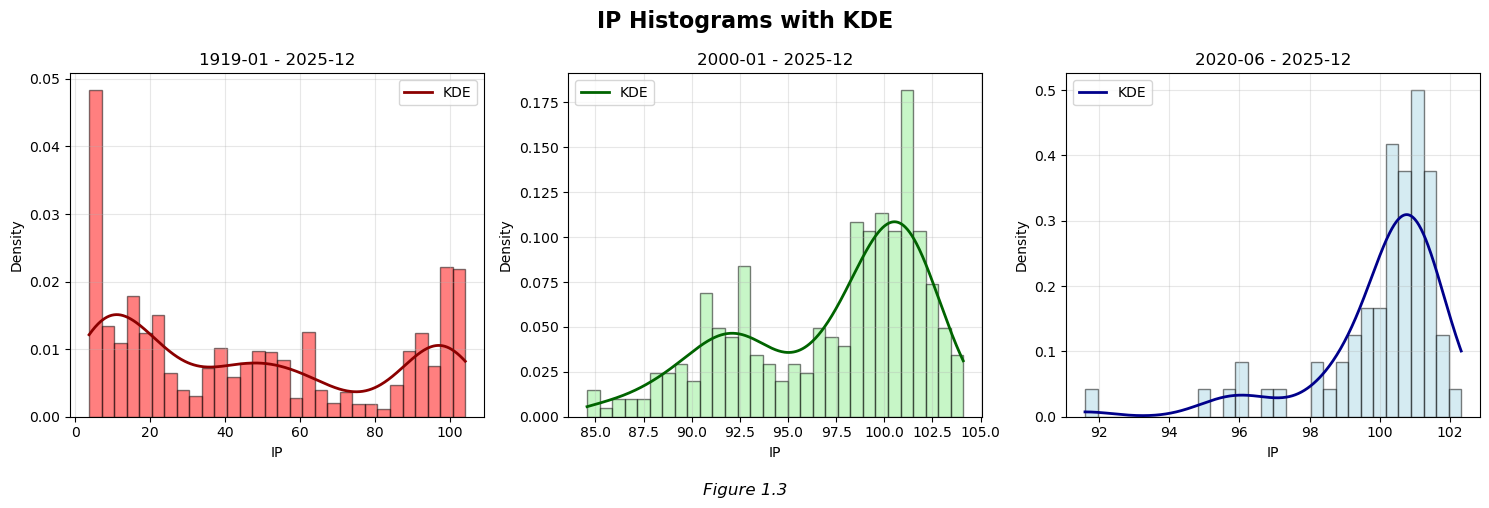

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes[0].hist(
    tf_all_dict['df']['indpro'],
    bins=30,
    color='red',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_all = scipy.stats.gaussian_kde(tf_all_dict['df']['indpro'])
arr_all = np.linspace(
    tf_all_dict['df']['indpro'].min(),
    tf_all_dict['df']['indpro'].max(),
    500
)
axes[0].plot(arr_all, kde_all(arr_all), color='darkred', linewidth=2, label='KDE')
axes[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes[0].set_xlabel('IP')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes[1].hist(
    tf_00s_dict['df']['indpro'],
    bins=30,
    color='lightgreen',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_00s = scipy.stats.gaussian_kde(tf_00s_dict['df']['indpro'])
arr_00s = np.linspace(
    tf_00s_dict['df']['indpro'].min(),
    tf_00s_dict['df']['indpro'].max(),
    500
)
axes[1].plot(arr_00s, kde_00s(arr_00s), color='darkgreen', linewidth=2, label='KDE')
axes[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes[1].set_xlabel('IP')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes[2].hist(tf_20s_dict['df']['indpro'], bins=30, color='lightblue', alpha=0.5, edgecolor='black', density=True)
kde_20s = scipy.stats.gaussian_kde(tf_20s_dict['df']['indpro'])
arr_20s = np.linspace(
    tf_20s_dict['df']['indpro'].min(),
    tf_20s_dict['df']['indpro'].max(),
    500
)
axes[2].plot(arr_20s, kde_20s(arr_20s), color='darkblue', linewidth=2, label='KDE')
axes[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes[2].set_xlabel('IP')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
######################################################################

fig.suptitle('IP Histograms with KDE', fontsize=16, fontweight='bold')
fig.text(0.5, 0.01, 'Figure 1.3', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()

# Question 2.1 - Brief discussion of summary statistics and plots found in Question 1.

#####
&nbsp;&nbsp;&nbsp;&nbsp;From the summary statistics and the plots, we can immediately see that the IP data in all three timeframes is not normally distributed. This is made most visually clear in Figure 1.3 when looking at the KDE curves. The summary statistics found in Questions 1.1 to 1.3 should align with what we see in the KDE curves of each respective timeframe.

&nbsp;&nbsp;&nbsp;&nbsp;In the timeframe from 1919-01 to 2025-12, IP skewness is 0.3519 and kurtosis is -1.3768, which aligns with the slight right skew and the  flattened W bimodal shape of the red KDE. The roughly bimodal shape suggests economic cycles of growth and contraction.

&nbsp;&nbsp;&nbsp;&nbsp;For 2000-01 to 2025-12, IP skewness is -0.7187 and kurtosis is -0.5824, which matches the moderate left skew and bimodal shape of the green KDE, with a small peak around 90 to 95 and a larger peak around 98 to 102. Referring to Figure 1.2, it appears that many of the values in the smaller peak come from the 2008 recession years.

&nbsp;&nbsp;&nbsp;&nbsp;For 2020-06 to 2025-12, IP has skewness -2.2486 and kurtosis 6.179, consistent with the strong left skew and one large peak around 100 to 102 in the lightblue KDE. The high positive kurtosis indicates heavy tails and a very peaked distribution, as expected given the negative economic impacts of covid.

# Question 2.2 - Great recession of 2008 and covid.

#####
&nbsp;&nbsp;&nbsp;&nbsp; The green curve in Figure 1.2 captures the industrial production data over both the great recession of 2008 and covid. From the prolonged valley in the graph around 2008, we can see that industrial production took considerably longer to recover when compared to the decrease during the 2020 pandemic. The blue curve, 2020-06 to 2025-12, in Figure 1.2 shows industrial production rapidly growing at the start of the timeframe, again showing that industrial production recovered faster during the covid years than during the great recession years. In Figure 1.1, the blue boxplot displays several smaller points as outliers, representing the comparatively brief but sharp economic downturn during the covid years.

&nbsp;&nbsp;&nbsp;&nbsp; In terms of forecasting and model fitting, we will have to consider how to handle the data during these two periods of economic volatility and downturn. The selected method - treating as outliers, unusual shocks, applying more advanced modeling methods, etc - may depend upon what future events we are attempting to model and predict.

# Question 3.0 Download and prep data on Personal Consumption Expediture, PCE.

## PCE data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/PCE

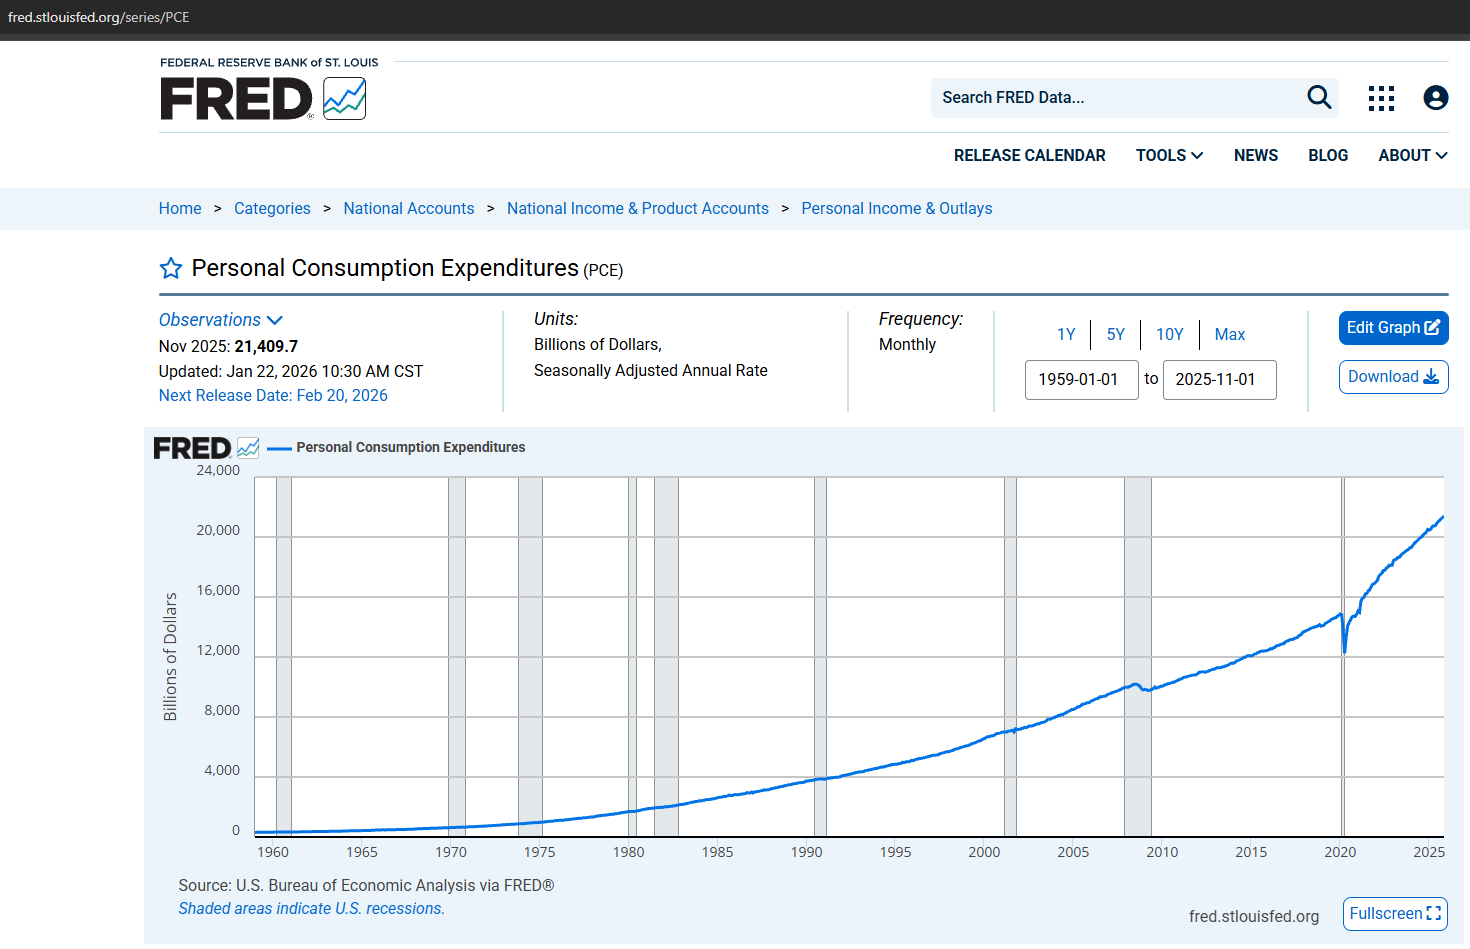

In [168]:
display(Image(rf'{assignment_1_images_dir}\\fred_pce_download.png'))

## Read the downloaded PCE csv and assign dtypes.

In [169]:
df_pce = pd.read_csv(rf"{assignment_1_dir}\\PCE.csv")
df_pce['observation_date'] = pd.to_datetime(df_pce['observation_date'])
df_pce = df_pce.rename(columns={'PCE': 'pce'})

print(df_pce.info())
print(f"df_pce shape: {df_pce.shape}")
print("Successfully read PCE file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  803 non-null    datetime64[ns]
 1   pce               803 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB
None
df_pce shape: (803, 2)
Successfully read PCE file.


## Add additional timeframe columns.

In [170]:
df_pce = df_pce.assign(
    year_quarter = pd.PeriodIndex(
        df_pce['observation_date'],
        freq='Q'
    ),
    year_month = df_pce['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_pce.info())
print(f"df_pce shape: {df_pce.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  803 non-null    datetime64[ns]
 1   pce               803 non-null    float64       
 2   year_quarter      803 non-null    period[Q-DEC] 
 3   year_month        803 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 25.2 KB
None
df_pce shape: (803, 4)
Additional timeframe columns have been assigned.


## Sort df_pce by observation_date ascending.

In [171]:
df_pce = df_pce.sort_values(by=['observation_date']).reset_index(drop=True)

## Display some rows of df_pce and statistics on the observation date.

In [172]:
display(df_pce.sample(n=10))
display(df_pce['observation_date'].describe())

,observation_date,pce,year_quarter,year_month
752,2021-09-01,16489.6,2021Q3,202109
121,1969-02-01,588.7,1969Q1,196902
92,1966-09-01,489.2,1966Q3,196609
123,1969-04-01,593.9,1969Q2,196904
607,2009-08-01,10004.1,2009Q3,200908
716,2018-09-01,14017.8,2018Q3,201809
168,1973-01-01,816.5,1973Q1,197301
671,2014-12-01,12096.1,2014Q4,201412
269,1981-06-01,1934.5,1981Q2,198106
231,1978-04-01,1396.4,1978Q2,197804


count                              803
mean     1992-05-31 20:46:19.576587776
min                1959-01-01 00:00:00
25%                1975-09-16 00:00:00
50%                1992-06-01 00:00:00
75%                2009-02-15 00:00:00
max                2025-11-01 00:00:00
Name: observation_date, dtype: object

# Question 3.1 - Summary statistics and plots.

## PCE summary statistics for Question 3.

In [173]:
tf_pce_all_dict = {'df': df_pce} | summary_statistics(df_pce, 'pce', 'observation_date')

print(f"PCE summary statistics, timeframe from {tf_pce_all_dict['min_date'].strftime('%Y-%m')} to {tf_pce_all_dict['max_date'].strftime('%Y-%m')}")
display(tf_pce_all_dict['df_summary_stats'])

PCE summary statistics, timeframe from 1959-01 to 2025-11


,statistic,value
0,mean,6.022802e+03
1,median,4.177100e+03
2,var,3.101068e+07
3,std_dev,5.568723e+03
4,skewness,8.951000e-01
5,kurtosis,-1.607000e-01


## IP and PCE boxplots for Question 3.

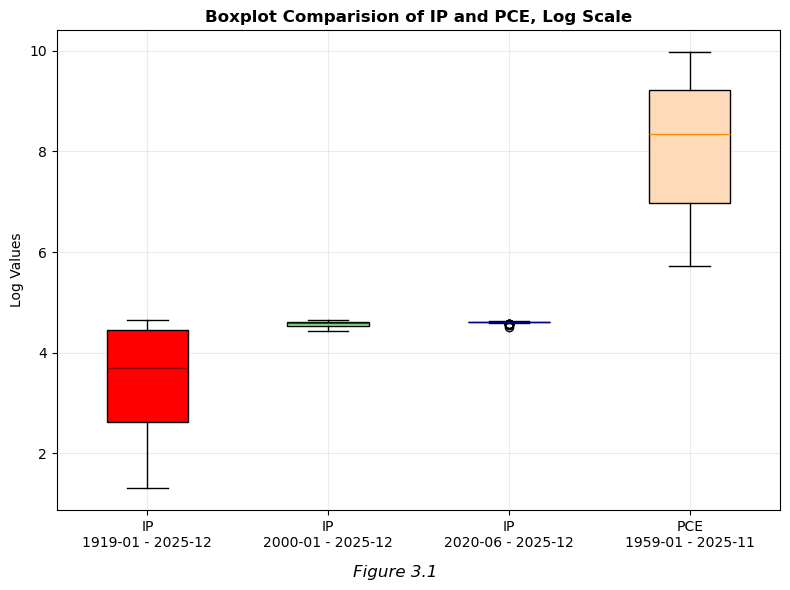

In [174]:
fig_box, ax_box = plt.subplots(figsize=(8, 6))

# Copy and paste the above boxplot code from question 1, then add in PCE.
bp = ax_box.boxplot(
    [
        np.log(tf_all_dict['df']['indpro']),
        np.log(tf_00s_dict['df']['indpro']),
        np.log(tf_20s_dict['df']['indpro']),
        np.log(tf_pce_all_dict['df']['pce'])
    ],
    positions=[1, 2, 3, 4],
    tick_labels=[
        f"IP\n{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}",
        f"IP\n{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}",
        f"IP\n{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}",
        f"PCE\n{tf_pce_all_dict['min_date'].strftime('%Y-%m')} - {tf_pce_all_dict['max_date'].strftime('%Y-%m')}"
    ],
    patch_artist=True
)


box_colors = ['red', 'lightgreen', 'lightblue', 'peachpuff']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

median_colors = ['darkred', 'darkgreen', 'darkblue', 'darkorange']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(1)


ax_box.set_ylabel('Log Values')
ax_box.set_title("Boxplot Comparision of IP and PCE, Log Scale", fontweight='bold')
ax_box.grid(True, alpha=0.25)

fig_box.text(0.5, 0.03, 'Figure 3.1', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## IP and PCE line plots for Question 3.

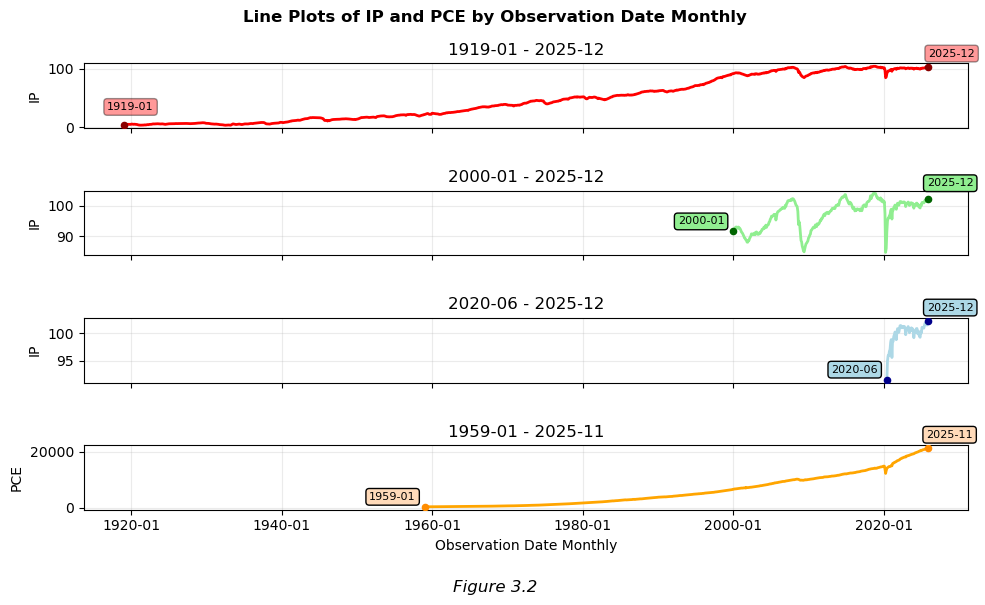

In [179]:
fig_lines, axes_lines = plt.subplots(nrows=4, ncols=1, figsize=(10, 6), sharex=True, sharey=False)

######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes_lines[0].plot(tf_all_dict['df']['observation_date'], tf_all_dict['df']['indpro'], label='all', color='red', linewidth=2)
axes_lines[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes_lines[0].set_ylabel('IP')
axes_lines[0].grid(True, alpha=0.25)
# Annotate min and max dates.
# Annotate the min date.
axes_lines[0].scatter(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].iloc[0], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['min_date'], tf_all_dict['df']['indpro'].min()),
    xytext=(-12, 11),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
# Annotate the max date.
axes_lines[0].scatter(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].iloc[-1], color='darkred', s=20, zorder=5)
axes_lines[0].annotate(
    tf_all_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_all_dict['max_date'], tf_all_dict['df']['indpro'].max()),
    xytext=(0, 7),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.4)
)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes_lines[1].plot(tf_00s_dict['df']['observation_date'], tf_00s_dict['df']['indpro'], label='2000s', color='lightgreen', linewidth=2)
axes_lines[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[1].set_ylabel('IP')
axes_lines[1].grid(True, alpha=0.25)
# Annotate the min and max dates.
# Annotate the min date.
axes_lines[1].scatter(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['min_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
# Annotate the max date.
axes_lines[1].scatter(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[-1], color='darkgreen', s=20, zorder=5)
axes_lines[1].annotate(
    tf_00s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_00s_dict['max_date'], tf_00s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 32.5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=1)
)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes_lines[2].plot(tf_20s_dict['df']['observation_date'], tf_20s_dict['df']['indpro'], label='2020s', color='lightblue', linewidth=2)
axes_lines[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes_lines[2].set_ylabel('IP')
axes_lines[2].grid(True, alpha=0.25)
# Annotate the min and max dates.
# Annotate the min date.
axes_lines[2].scatter(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['min_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
# Annotate the max date.
axes_lines[2].scatter(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[-1], color='darkblue', s=20, zorder=5)
axes_lines[2].annotate(
    tf_20s_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_20s_dict['max_date'], tf_20s_dict['df']['indpro'].iloc[0]),
    xytext=(-1, 49.7),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=1)
)
######################################################################


######################################################################
#### PCE, 1959-01 to 2025-11. ####
axes_lines[3].plot(tf_pce_all_dict['df']['observation_date'], tf_pce_all_dict['df']['pce'], label='all', color='orange', linewidth=2)
axes_lines[3].set_title(f"{tf_pce_all_dict['min_date'].strftime('%Y-%m')} - {tf_pce_all_dict['max_date'].strftime('%Y-%m')}")
axes_lines[3].set_ylabel('PCE')
axes_lines[3].set_xlabel('Observation Date Monthly')
axes_lines[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes_lines[3].grid(True, alpha=0.25)
# Annotate the min and max dates.
# Annotate the min date.
axes_lines[3].scatter(tf_pce_all_dict['min_date'], tf_pce_all_dict['df']['pce'].iloc[0], color='darkorange', s=20, zorder=5)
axes_lines[3].annotate(
    tf_pce_all_dict['min_date'].strftime('%Y-%m'),
    xy=(tf_pce_all_dict['min_date'], tf_pce_all_dict['df']['pce'].iloc[0]),
    xytext=(-40, 5),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='peachpuff', alpha=1)
)
# Annotate the max date.
axes_lines[3].scatter(tf_pce_all_dict['max_date'], tf_pce_all_dict['df']['pce'].iloc[-1], color='darkorange', s=20, zorder=5)
axes_lines[3].annotate(
    tf_pce_all_dict['max_date'].strftime('%Y-%m'),
    xy=(tf_pce_all_dict['max_date'], tf_pce_all_dict['df']['pce'].iloc[0]),
    xytext=(-1, 49.7),
    textcoords='offset points',
    fontsize=8,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='peachpuff', alpha=1)
)
######################################################################


fig_lines.suptitle("Line Plots of IP and PCE by Observation Date Monthly", fontweight='bold')
fig_lines.text(0.5, 0.01, 'Figure 3.2', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()


## IP and PCE histograms and KDE for Question 3.

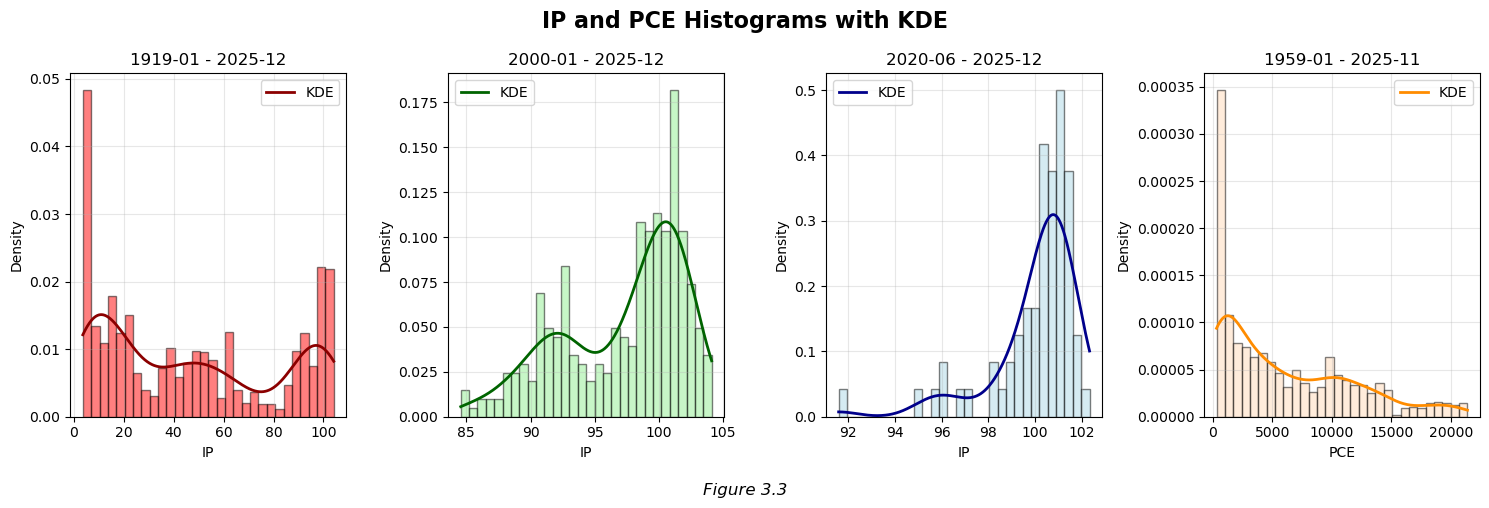

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))


######################################################################
#### All dates, from 1919-01 to 2025-12. ####
axes[0].hist(
    tf_all_dict['df']['indpro'],
    bins=30,
    color='red',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_all = scipy.stats.gaussian_kde(tf_all_dict['df']['indpro'])
arr_all = np.linspace(
    tf_all_dict['df']['indpro'].min(),
    tf_all_dict['df']['indpro'].max(),
    500
)
axes[0].plot(arr_all, kde_all(arr_all), color='darkred', linewidth=2, label='KDE')
axes[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}")
axes[0].set_xlabel('IP')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2000s, from 2000-01 to 2025-12 ####
axes[1].hist(
    tf_00s_dict['df']['indpro'],
    bins=30,
    color='lightgreen',
    alpha=0.5,
    edgecolor='black',
    density=True
)
kde_00s = scipy.stats.gaussian_kde(tf_00s_dict['df']['indpro'])
arr_00s = np.linspace(
    tf_00s_dict['df']['indpro'].min(),
    tf_00s_dict['df']['indpro'].max(),
    500
)
axes[1].plot(arr_00s, kde_00s(arr_00s), color='darkgreen', linewidth=2, label='KDE')
axes[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}")
axes[1].set_xlabel('IP')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
######################################################################


######################################################################
#### 2020s, from 2020-06 to 2025-12 ####
axes[2].hist(tf_20s_dict['df']['indpro'], bins=30, color='lightblue', alpha=0.5, edgecolor='black', density=True)
kde_20s = scipy.stats.gaussian_kde(tf_20s_dict['df']['indpro'])
arr_20s = np.linspace(
    tf_20s_dict['df']['indpro'].min(),
    tf_20s_dict['df']['indpro'].max(),
    500
)
axes[2].plot(arr_20s, kde_20s(arr_20s), color='darkblue', linewidth=2, label='KDE')
axes[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}")
axes[2].set_xlabel('IP')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
######################################################################


######################################################################
#### PCE, 1959-01 to 2025-11. ####
axes[3].hist(tf_pce_all_dict['df']['pce'], bins=30, color='peachpuff', alpha=0.5, edgecolor='black', density=True)
kde_pce_all = scipy.stats.gaussian_kde(tf_pce_all_dict['df']['pce'])
arr_pce_all = np.linspace(
    tf_pce_all_dict['df']['pce'].min(),
    tf_pce_all_dict['df']['pce'].max(),
    500
)
axes[3].plot(arr_pce_all, kde_pce_all(arr_pce_all), color='darkorange', linewidth=2, label='KDE')
axes[3].set_title(f"{tf_pce_all_dict['min_date'].strftime('%Y-%m')} - {tf_pce_all_dict['max_date'].strftime('%Y-%m')}")
axes[3].set_xlabel('PCE')
axes[3].set_ylabel('Density')
axes[3].legend()
axes[3].grid(True, alpha=0.3)
######################################################################


fig.suptitle('IP and PCE Histograms with KDE', fontsize=16, fontweight='bold')
fig.text(0.5, 0.01, 'Figure 3.3', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1], h_pad=2.5)
plt.show()

# Question 3.2 - Brief discussion of PCE summary statistics and plots compared to those of IP.

#####
&nbsp;&nbsp;&nbsp;&nbsp; In Figure 3.3, the orange KDE curve of PCE is right skewed, which along with the orange line in Figure 3.2 tells us that PCE has been increasing since 1959-01. The PCE kurtosis value of -0.1607, indicating light tails in the distribution, tells us that the increase is caused by steady growth rather than extreme outliers. However, the red KDE curve has a roughly bimodal flattened W shape, suggesting that IP is influenced by cycles of growth and contraction in the economy. Thus, over the two historical timeframes of IP and PCE, it appears clear that these two sections of the economy have fundamentally different growth structures, with IP exhibiting cyclical fluctuations and PCE exhibiting a steady increase.